### Importing Libraries

In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt



Importing the data.

In [3]:
df=pd.read_excel("C:\\Users\\Max\\Downloads\\HelloFresh_Excel_Assessment (2).xlsx", sheet_name="Data")

df

,date_sign_up,customer_id,product_name,marketing_channel,City
0,2015-04-17 13:11:19,9f918,Classic - 3 meals per week for 2 people,Search Engine Marketing,San Diego
1,2015-04-14 11:32:19,79a90,Classic - 3 meals per week for 2 people,Newsletters (internal),Los Angeles
2,2015-04-14 09:53:20,7b784,Classic - 3 meals per week for 2 people,Newsletters (internal),Los Angeles
3,2015-04-14 16:08:18,dce30,Classic - 3 meals per week for 4 people,Newsletters (internal),San Francisco
4,2015-04-18 08:04:20,5b187,Classic - 3 meals per week for 2 people,Newsletters (internal),San Diego
...,...,...,...,...,...
857,2015-04-19 21:35:19,77df8,Classic - 3 meals per week for 2 people,TV / Radio Advertising,Miami
858,2015-04-19 22:14:19,2584d,Classic - 3 meals per week for 4 people,Partnership Marketing,Miami
859,2015-04-19 22:33:19,91139,Classic - 3 meals per week for 2 people,TV / Radio Advertising,Miami
860,2015-04-19 22:54:18,fdf44,Classic - 3 meals per week for 2 people,Partnership Marketing,Miami


Creating a Serial number column

In [4]:
df.shape

df["Sl"]=np.arange(df.shape[0])


In [5]:
df

,date_sign_up,customer_id,product_name,marketing_channel,City,Sl
0,2015-04-17 13:11:19,9f918,Classic - 3 meals per week for 2 people,Search Engine Marketing,San Diego,0
1,2015-04-14 11:32:19,79a90,Classic - 3 meals per week for 2 people,Newsletters (internal),Los Angeles,1
2,2015-04-14 09:53:20,7b784,Classic - 3 meals per week for 2 people,Newsletters (internal),Los Angeles,2
3,2015-04-14 16:08:18,dce30,Classic - 3 meals per week for 4 people,Newsletters (internal),San Francisco,3
4,2015-04-18 08:04:20,5b187,Classic - 3 meals per week for 2 people,Newsletters (internal),San Diego,4
...,...,...,...,...,...,...
857,2015-04-19 21:35:19,77df8,Classic - 3 meals per week for 2 people,TV / Radio Advertising,Miami,857
858,2015-04-19 22:14:19,2584d,Classic - 3 meals per week for 4 people,Partnership Marketing,Miami,858
859,2015-04-19 22:33:19,91139,Classic - 3 meals per week for 2 people,TV / Radio Advertising,Miami,859
860,2015-04-19 22:54:18,fdf44,Classic - 3 meals per week for 2 people,Partnership Marketing,Miami,860


Data cleaning

In [6]:
df["City"].value_counts()


San Diego        203
Miami            163
San Francisco    136
Philadelphia     125
Los Angeles      122
Washington        49
Chicago           39
New York          15
San Diego          6
SanDiego           2
1San Diego         1
San Dego           1
Name: City, dtype: int64

San diego is mispelled in a few rows. I will be replacing those values with the correct spelling.

In [7]:
df.loc[(df["City"]=="1San Diego") | ( df["City"]=="SanDiego") |
 (df["City"]=="San Dego") | (df["City"]=="San Diego "), "City"]="San Diego"




Another way of cleaning values based of multiple conditions.

In [8]:
df["City"]=np.where((df["City"]=="San Dego") | (df["City"]=="San Diego ") | 
(df["City"]=="1San Diego") | (df["City"]=="SanDiego"), "San Diego", df["City"])

In [9]:
df.City.value_counts()

San Diego        213
Miami            163
San Francisco    136
Philadelphia     125
Los Angeles      122
Washington        49
Chicago           39
New York          15
Name: City, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_sign_up       862 non-null    datetime64[ns]
 1   customer_id        862 non-null    object        
 2   product_name       862 non-null    object        
 3   marketing_channel  862 non-null    object        
 4   City               862 non-null    object        
 5   Sl                 862 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(4)
memory usage: 37.2+ KB


Importing the States Sheet

In [11]:
state=pd.read_excel("C:\\Users\\Max\\Downloads\\HelloFresh_Excel_Assessment (2).xlsx", sheet_name="State", header=None)

In [12]:
state

,0,1,2,3,4,5,6,7,8
0,State,California,California,California,Florida,Pennsylvania,Washington,Illinois,New York
1,City,San Diego,Los Angeles,San Francisco,Miami,Philadelphia,Washington,Chicago,New York


Transposing the columns to rows to get new columns, City and State.

In [13]:
state=state.T
state.drop([0], axis=0, inplace=True)

state["State"]=state[0]
state["City"]=state[1]
state.drop([0, 1], axis=1, inplace=True)

In [14]:

state

,State,City
1,California,San Diego
2,California,Los Angeles
3,California,San Francisco
4,Florida,Miami
5,Pennsylvania,Philadelphia
6,Washington,Washington
7,Illinois,Chicago
8,New York,New York


Merging the datasets "state" and "df" on common column "city".

In [55]:
merged_df=pd.merge(left=df, right=state, how="left", left_on="City", right_on="City")

In [56]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 861
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_sign_up       862 non-null    datetime64[ns]
 1   customer_id        862 non-null    object        
 2   product_name       862 non-null    object        
 3   marketing_channel  862 non-null    object        
 4   City               862 non-null    object        
 5   Sl                 862 non-null    int32         
 6   State              862 non-null    object        
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 50.5+ KB


There are 213 NA values in "State" column. There could be extra spaces in "city" column of State dataframe. Using strip function I can delete extra spaces in values.

In [57]:
merged_df.isna().sum()
state["City"]=state["City"].str.strip()
state.loc[state["City"]=="San Diego "]

,State,City


Merging Dataframes again.

In [58]:
merged_df=pd.merge(left=df, right=state, how="left", left_on="City", right_on="City")

In [59]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 861
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_sign_up       862 non-null    datetime64[ns]
 1   customer_id        862 non-null    object        
 2   product_name       862 non-null    object        
 3   marketing_channel  862 non-null    object        
 4   City               862 non-null    object        
 5   Sl                 862 non-null    int32         
 6   State              862 non-null    object        
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 50.5+ KB


### Question

1. How many customers purchased more than 1 product? (Hint: Customer ID stays the same per customer when he/she buys several food boxes)													


In [234]:
most_buy=merged_df["customer_id"].value_counts().reset_index()
most_buy=pd.DataFrame(most_buy)
most_buy=most_buy.rename(columns={"index":"Customer_ID", "customer_id": "Times bought"})


In [235]:
most_buy.loc[most_buy["Times bought"]>=2]

,Customer_ID,Times bought
0,70f50,3
1,abdd5,2
2,f6c78,2
3,cd62d,2
4,d61ac,2


2. Prepare a chart that shows sold food boxes per weekday (Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday; show how you calculated weekday)															


Creating a weekday column in the dataframe merged_df.

In [61]:
merged_df["Weekday"]=merged_df["date_sign_up"].dt.day_name()
merged_df.dtypes

date_sign_up         datetime64[ns]
customer_id                  object
product_name                 object
marketing_channel            object
City                         object
Sl                            int32
State                        object
Weekday                      object
dtype: object

In [62]:
week=merged_df["Weekday"].value_counts().reset_index()
week

,index,Weekday
0,Tuesday,221
1,Wednesday,187
2,Sunday,128
3,Monday,105
4,Saturday,87
5,Friday,71
6,Thursday,63


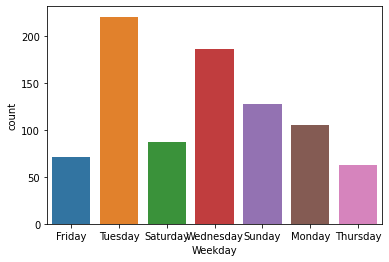

In [63]:
import seaborn as sns
ax=sns.countplot(data=merged_df, x="Weekday", orient="h")

plt.show()


3. What was the earliest and what was the latest time of the day we sold a product on 14.04.2015? Use column A from tab Data and explain how you got to your result.

In [64]:
merged_df["Date"]=merged_df["date_sign_up"].dt.date
merged_df

,date_sign_up,customer_id,product_name,marketing_channel,City,Sl,State,Weekday,Date
0,2015-04-17 13:11:19,9f918,Classic - 3 meals per week for 2 people,Search Engine Marketing,San Diego,0,California,Friday,2015-04-17
1,2015-04-14 11:32:19,79a90,Classic - 3 meals per week for 2 people,Newsletters (internal),Los Angeles,1,California,Tuesday,2015-04-14
2,2015-04-14 09:53:20,7b784,Classic - 3 meals per week for 2 people,Newsletters (internal),Los Angeles,2,California,Tuesday,2015-04-14
3,2015-04-14 16:08:18,dce30,Classic - 3 meals per week for 4 people,Newsletters (internal),San Francisco,3,California,Tuesday,2015-04-14
4,2015-04-18 08:04:20,5b187,Classic - 3 meals per week for 2 people,Newsletters (internal),San Diego,4,California,Saturday,2015-04-18
...,...,...,...,...,...,...,...,...,...
857,2015-04-19 21:35:19,77df8,Classic - 3 meals per week for 2 people,TV / Radio Advertising,Miami,857,Florida,Sunday,2015-04-19
858,2015-04-19 22:14:19,2584d,Classic - 3 meals per week for 4 people,Partnership Marketing,Miami,858,Florida,Sunday,2015-04-19
859,2015-04-19 22:33:19,91139,Classic - 3 meals per week for 2 people,TV / Radio Advertising,Miami,859,Florida,Sunday,2015-04-19
860,2015-04-19 22:54:18,fdf44,Classic - 3 meals per week for 2 people,Partnership Marketing,Miami,860,Florida,Sunday,2015-04-19


In [80]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%Y-%m-%d')

In [83]:
selected_date=merged_df[merged_df["Date"]=="2015-04-14"]
selected_date

,date_sign_up,customer_id,product_name,marketing_channel,City,Sl,State,Weekday,Date
1,2015-04-14 11:32:19,79a90,Classic - 3 meals per week for 2 people,Newsletters (internal),Los Angeles,1,California,Tuesday,2015-04-14
2,2015-04-14 09:53:20,7b784,Classic - 3 meals per week for 2 people,Newsletters (internal),Los Angeles,2,California,Tuesday,2015-04-14
3,2015-04-14 16:08:18,dce30,Classic - 3 meals per week for 4 people,Newsletters (internal),San Francisco,3,California,Tuesday,2015-04-14
10,2015-04-14 10:26:24,0e344,Classic - 3 meals per week for 2 people,Search Engine Marketing,Los Angeles,10,California,Tuesday,2015-04-14
15,2015-04-14 08:35:20,92090,Classic - 3 meals per week for 2 people,TV / Radio Advertising,Los Angeles,15,California,Tuesday,2015-04-14
...,...,...,...,...,...,...,...,...,...
343,2015-04-14 22:56:18,d6636,Classic - 3 meals per week for 2 people,Search Engine Marketing,San Francisco,343,California,Tuesday,2015-04-14
344,2015-04-14 23:08:20,bbd93,Classic - 3 meals per week for 2 people,Newsletters (internal),San Francisco,344,California,Tuesday,2015-04-14
345,2015-04-14 23:05:18,e3f4f,Classic - 3 meals per week for 2 people,TV / Radio Advertising,San Francisco,345,California,Tuesday,2015-04-14
346,2015-04-14 23:08:19,64942,Classic - 3 meals per week for 2 people,TV / Radio Advertising,San Francisco,346,California,Tuesday,2015-04-14


In [93]:
f=selected_date.sort_values(by="date_sign_up", ascending=True).head(1)
l=selected_date.sort_values(by="date_sign_up", ascending=False).head(1)
print("The earliest time of order on 2015-04-14 was : {}".format(f["date_sign_up"]))
print("The earliest time of order on 2015-04-14 was : {}".format(l["date_sign_up"]))

The earliest time of order on 2015-04-14 was : 133   2015-04-14 03:16:18
Name: date_sign_up, dtype: datetime64[ns]
The earliest time of order on 2015-04-14 was : 347   2015-04-14 23:13:19
Name: date_sign_up, dtype: datetime64[ns]


4. How many products did we sell for 2 people and how many products did we sell for 4 people?

In [95]:
merged_df["product_name"].value_counts()


Classic - 3 meals per week for 2 people    635
Classic - 3 meals per week for 4 people    130
3 Meals (vegetarian) for 2 people           85
3 Meals (vegetarian) for 4 people           12
Name: product_name, dtype: int64

In [144]:
met=merged_df.copy()
met


,date_sign_up,customer_id,product_name,marketing_channel,City,Sl,State,Weekday,Date
0,2015-04-17 13:11:19,9f918,Classic - 3 meals per week for 2 people,Search Engine Marketing,San Diego,0,California,Friday,2015-04-17
1,2015-04-14 11:32:19,79a90,Classic - 3 meals per week for 2 people,Newsletters (internal),Los Angeles,1,California,Tuesday,2015-04-14
2,2015-04-14 09:53:20,7b784,Classic - 3 meals per week for 2 people,Newsletters (internal),Los Angeles,2,California,Tuesday,2015-04-14
3,2015-04-14 16:08:18,dce30,Classic - 3 meals per week for 4 people,Newsletters (internal),San Francisco,3,California,Tuesday,2015-04-14
4,2015-04-18 08:04:20,5b187,Classic - 3 meals per week for 2 people,Newsletters (internal),San Diego,4,California,Saturday,2015-04-18
...,...,...,...,...,...,...,...,...,...
857,2015-04-19 21:35:19,77df8,Classic - 3 meals per week for 2 people,TV / Radio Advertising,Miami,857,Florida,Sunday,2015-04-19
858,2015-04-19 22:14:19,2584d,Classic - 3 meals per week for 4 people,Partnership Marketing,Miami,858,Florida,Sunday,2015-04-19
859,2015-04-19 22:33:19,91139,Classic - 3 meals per week for 2 people,TV / Radio Advertising,Miami,859,Florida,Sunday,2015-04-19
860,2015-04-19 22:54:18,fdf44,Classic - 3 meals per week for 2 people,Partnership Marketing,Miami,860,Florida,Sunday,2015-04-19


Creating another column called "People_count" to indicate whether the product was for two peole or four people.

In [145]:
sub="2"
for i, row in met.iterrows():
    if sub in met["product_name"].iloc[i]:
        
        met.at[i, "people_count"]="Two"   
    else:
        met.at[i, "people_count"]="Four"
    


In [155]:

people=met["people_count"].value_counts()
print("Number of meal kits sold to four people is {}".format(people[1]))
print("Number of meal kits sold to two people is {}".format(people[0]))

Number of meal kits sold to four people is 142
Number of meal kits sold to two people is 720


5. Prepare an additional column in tab Data, in which you convert format "Date Time" from column A into format "Date" with a formula and prepare an overview how many classic food boxes and how many veggie food boxes we sold per "Date".

In [159]:
met["product_name"].value_counts()

Classic - 3 meals per week for 2 people    635
Classic - 3 meals per week for 4 people    130
3 Meals (vegetarian) for 2 people           85
3 Meals (vegetarian) for 4 people           12
Name: product_name, dtype: int64

Creating another column called product_type which indicates whether the product is veggie or classic.

In [160]:
sub="Classic"
for i, row in met.iterrows():
    if sub in met["product_name"].iloc[i]:
        
        met.at[i, "product_type"]="Classic"   
    else:
        met.at[i, "product_type"]="Veggie"

In [162]:
met["product_type"].value_counts()

Classic    765
Veggie      97
Name: product_type, dtype: int64

In [182]:
k=met.groupby(["Date","product_type"]).size().reset_index()
k=pd.DataFrame(k)
k.rename(columns={0:"Number of times bought"})

,Date,product_type,Number of times bought
0,2015-04-13,Classic,90
1,2015-04-13,Veggie,15
2,2015-04-14,Classic,205
3,2015-04-14,Veggie,16
4,2015-04-15,Classic,168
5,2015-04-15,Veggie,19
6,2015-04-16,Classic,53
7,2015-04-16,Veggie,10
8,2015-04-17,Classic,60
9,2015-04-17,Veggie,11


6. How many veggie food boxes (hint: column C) did we sell on 14.04.2015 (hint: column A) via marketing channel Newsletters (hint: column D); Solve with 1 formula and show the formula you used.

In [183]:
met

,date_sign_up,customer_id,product_name,marketing_channel,City,Sl,State,Weekday,Date,people_count,product_type
0,2015-04-17 13:11:19,9f918,Classic - 3 meals per week for 2 people,Search Engine Marketing,San Diego,0,California,Friday,2015-04-17,Two,Classic
1,2015-04-14 11:32:19,79a90,Classic - 3 meals per week for 2 people,Newsletters (internal),Los Angeles,1,California,Tuesday,2015-04-14,Two,Classic
2,2015-04-14 09:53:20,7b784,Classic - 3 meals per week for 2 people,Newsletters (internal),Los Angeles,2,California,Tuesday,2015-04-14,Two,Classic
3,2015-04-14 16:08:18,dce30,Classic - 3 meals per week for 4 people,Newsletters (internal),San Francisco,3,California,Tuesday,2015-04-14,Four,Classic
4,2015-04-18 08:04:20,5b187,Classic - 3 meals per week for 2 people,Newsletters (internal),San Diego,4,California,Saturday,2015-04-18,Two,Classic
...,...,...,...,...,...,...,...,...,...,...,...
857,2015-04-19 21:35:19,77df8,Classic - 3 meals per week for 2 people,TV / Radio Advertising,Miami,857,Florida,Sunday,2015-04-19,Two,Classic
858,2015-04-19 22:14:19,2584d,Classic - 3 meals per week for 4 people,Partnership Marketing,Miami,858,Florida,Sunday,2015-04-19,Four,Classic
859,2015-04-19 22:33:19,91139,Classic - 3 meals per week for 2 people,TV / Radio Advertising,Miami,859,Florida,Sunday,2015-04-19,Two,Classic
860,2015-04-19 22:54:18,fdf44,Classic - 3 meals per week for 2 people,Partnership Marketing,Miami,860,Florida,Sunday,2015-04-19,Two,Classic


In [197]:
channel=met.loc[(met["Date"]=="2015-04-14") & (met["marketing_channel"]=="Newsletters (internal)") & (met["product_type"]=="Veggie")]

In [212]:
p=channel["product_type"].value_counts().reset_index()
p=pd.DataFrame(p)

print("Number of veggie boxes sold on 2015-04-14 through Newsletters (internal) method of marketing is {}.".format(p["product_type"].iloc[0]))

Number of veggie boxes sold on 2015-04-14 through Newsletters (internal) method of marketing is 11.


7. Count how many food boxes "Classic - 3 meals per week for 2 people" we sold via marketing channel "TV / Radio Advertising" (Solve with 1 formula and show the formula you used)

In [218]:
met

,date_sign_up,customer_id,product_name,marketing_channel,City,Sl,State,Weekday,Date,people_count,product_type
0,2015-04-17 13:11:19,9f918,Classic - 3 meals per week for 2 people,Search Engine Marketing,San Diego,0,California,Friday,2015-04-17,Two,Classic
1,2015-04-14 11:32:19,79a90,Classic - 3 meals per week for 2 people,Newsletters (internal),Los Angeles,1,California,Tuesday,2015-04-14,Two,Classic
2,2015-04-14 09:53:20,7b784,Classic - 3 meals per week for 2 people,Newsletters (internal),Los Angeles,2,California,Tuesday,2015-04-14,Two,Classic
3,2015-04-14 16:08:18,dce30,Classic - 3 meals per week for 4 people,Newsletters (internal),San Francisco,3,California,Tuesday,2015-04-14,Four,Classic
4,2015-04-18 08:04:20,5b187,Classic - 3 meals per week for 2 people,Newsletters (internal),San Diego,4,California,Saturday,2015-04-18,Two,Classic
...,...,...,...,...,...,...,...,...,...,...,...
857,2015-04-19 21:35:19,77df8,Classic - 3 meals per week for 2 people,TV / Radio Advertising,Miami,857,Florida,Sunday,2015-04-19,Two,Classic
858,2015-04-19 22:14:19,2584d,Classic - 3 meals per week for 4 people,Partnership Marketing,Miami,858,Florida,Sunday,2015-04-19,Four,Classic
859,2015-04-19 22:33:19,91139,Classic - 3 meals per week for 2 people,TV / Radio Advertising,Miami,859,Florida,Sunday,2015-04-19,Two,Classic
860,2015-04-19 22:54:18,fdf44,Classic - 3 meals per week for 2 people,Partnership Marketing,Miami,860,Florida,Sunday,2015-04-19,Two,Classic


In [219]:
op=met.loc[(met["marketing_channel"]=="TV / Radio Advertising") & (met["product_name"]=="Classic - 3 meals per week for 2 people") ]

In [221]:
print("The number of Classic - 3 meals per week for 2 people boxes sold via TV / Radio Advertising is {}".format(len(op)))

The number of Classic - 3 meals per week for 2 people boxes sold via TV / Radio Advertising is 203


8. Prepare a chart that shows sold food boxes per marketing channel in San Diego (Hint: You might have to clean up city name "San Diego" in column E first, explain how you got all San Diego variations into a format you can work with)

In [230]:
san_d=met.loc[met["City"]=="San Diego"]
san_dk=san_d.groupby("marketing_channel").size()
b=san_dk.reset_index()
b=pd.DataFrame(b)
b.rename(columns={0:"Number of boxes sold"})

,marketing_channel,Number of boxes sold
0,Newsletters (internal),83
1,Partnership Marketing,35
2,Search Engine Marketing,39
3,TV / Radio Advertising,56


9. Which customer ID bought most food boxes? Explain how you determined relevant customer ID and note down which city this customer ID comes from

In [237]:
most_buy.loc[most_buy["Times bought"]>=3]

,Customer_ID,Times bought
0,70f50,3


10. In an additional column in tab Data, mark all boxes sold in "New York" via Marketing channel "Newsletters (internal)" with a "1", all other box city combinations with a "0"; Solve with 1 formula

In [241]:
city="New York"
marketing="Newsletters(internal)"
for i, x in met.iterrows():
    if (met["City"].iloc[i]==city) & (met["marketing_channel"].iloc[i]=="Newsletters (internal)"):
        
        met.at[i, "new_york_value"]=1
    else:
        met.at[i, "new_york_value"]=0

In [252]:
ny=met["new_york_value"].value_counts().reset_index()
ny=pd.DataFrame(ny)
ny["new_york_value"].iloc[1]
print("Number of products sold in New York city through Newletter (internal) marketing is {}.".format(ny["new_york_value"].iloc[1]))

Number of products sold in New York city through Newletter (internal) marketing is 6.


11. Which marketing channels worked best in which states (Use tab "State" and prepare an overview: number of sold boxes per marketing channel per state)

In [280]:
met["State"].value_counts()

California      471
Florida         163
Pennsylvania    125
Washington       49
Illinois         39
New York         15
Name: State, dtype: int64

In [286]:
lt=met.groupby(["State", "marketing_channel"]).size().reset_index()
lt=pd.DataFrame(lt)
lt.rename(columns={0: "Times_bought"}, inplace=True)
lt_cal=lt.loc[lt["State"]=="California"]
lt_fl=lt.loc[lt["State"]=="Florida"]
lt_pa=lt.loc[lt["State"]=="Pennsylvania"]
lt_wa=lt.loc[lt["State"]=="Washington"]
lt_il=lt.loc[lt["State"]=="Illinois"]
lt_ny=lt.loc[lt["State"]=="New York"]


a=lt_cal.loc[lt_cal["Times_bought"].idxmax()]
b=lt_fl.loc[lt_fl["Times_bought"].idxmax()]
c=lt_pa.loc[lt_pa["Times_bought"].idxmax()]
d=lt_wa.loc[lt_wa["Times_bought"].idxmax()]
f=lt_il.loc[lt_il["Times_bought"].idxmax()]
g=lt_ny.loc[lt_ny["Times_bought"].idxmax()]




State                            California
marketing_channel    Newsletters (internal)
Times_bought                            247
Name: 0, dtype: object

In [290]:
bh=[a, b, c, d, f, g]

In [291]:
def most_state(a):
    print("Most products sold in the state of {} was via {} marketing channel which totalled {}.".format(a[0],a[1],a[2]))

for i in bh:
    most_state(i)

Most products sold in the state of California was via Newsletters (internal) marketing channel which totalled 247.
Most products sold in the state of Florida was via TV / Radio Advertising marketing channel which totalled 87.
Most products sold in the state of Pennsylvania was via Newsletters (internal) marketing channel which totalled 63.
Most products sold in the state of Washington was via Newsletters (internal) marketing channel which totalled 19.
Most products sold in the state of Illinois was via Newsletters (internal) marketing channel which totalled 17.
Most products sold in the state of New York was via Newsletters (internal) marketing channel which totalled 6.
